In [2]:
# Import packages
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import csv
import yaml
import random

In [3]:
# Load the processed data
adata = sc.read_h5ad("/Users/aumchampaneri/Databases/Triple/Hs_Nor-CKD-AKF_scRNA_processed.h5ad")

In [4]:
# Load the gene dictionary from the csv file
gene_dict = {}
with open('complement_gene_dictionary.csv', newline='') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        gene_dict[row[0]] = row[1]

# Load the tissue type dictionary from the yaml file
with open("Tissue Type Dictionary.yaml", "r") as file:
    cell_type_group = yaml.safe_load(file)

# Map cell types to groups
adata.obs['cell_type_group'] = 'Other'
for group, cell_types in cell_type_group.items():
    adata.obs.loc[adata.obs['cell_type'].isin(cell_types), 'cell_type_group'] = group

In [4]:
adata.obs

,orig.ident,nCount_RNA,SpecimenID,LibraryID,SampleID,Run,clusterNumber,subclass.l1,dataSource,diseasetype,...,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,n_genes
S2008000605HRT_AAACCCAGTGCACATT-1,S2008000605HRT,10505.0,S-2008-000605-HRT,5655_EO-2,163-3,5655_EO,2,PC,KPMP,Reference,...,kidney collecting duct principal cell,10x 3' v3,normal,Homo sapiens,male,kidney,European,sixth decade stage,%qABS>?Y(#,3651
S2008000605HRT_AAACCCAGTGCCTACG-1,S2008000605HRT,9698.0,S-2008-000605-HRT,5655_EO-2,163-3,5655_EO,2,PC,KPMP,Reference,...,kidney collecting duct principal cell,10x 3' v3,normal,Homo sapiens,male,kidney,European,sixth decade stage,YkxOG(VHZD,3070
S2008000605HRT_AAAGAACGTAGAGACC-1,S2008000605HRT,1540.0,S-2008-000605-HRT,5655_EO-2,163-3,5655_EO,11,VSMC/MC/FIB,KPMP,Reference,...,kidney interstitial cell,10x 3' v3,normal,Homo sapiens,male,kidney,European,sixth decade stage,6kvlh!ojgC,904
S2008000605HRT_AAAGAACGTCGGAACA-1,S2008000605HRT,4958.0,S-2008-000605-HRT,5655_EO-2,163-3,5655_EO,2,PC,KPMP,Reference,...,kidney collecting duct principal cell,10x 3' v3,normal,Homo sapiens,male,kidney,European,sixth decade stage,bA>ax>bp{_,1975
S2008000605HRT_AAAGAACGTTAACAGA-1,S2008000605HRT,6141.0,S-2008-000605-HRT,5655_EO-2,163-3,5655_EO,2,PC,KPMP,Reference,...,kidney collecting duct principal cell,10x 3' v3,normal,Homo sapiens,male,kidney,European,sixth decade stage,OK#dxbCA<9,3041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample1162EO2_TTTGGAGAGCAGGCAT-1,Sample1162EO2,10499.0,Sample1162-EO2,1162-EO-2,108,1162,2,PC,UMICH,Reference,...,kidney connecting tubule epithelial cell,10x 3' v3,normal,Homo sapiens,male,kidney,European,52-year-old stage,K{;U<2SC?^,3253
Sample1162EO2_TTTGGAGAGTCGCGAA-1,Sample1162EO2,3354.0,Sample1162-EO2,1162-EO-2,108,1162,8,EC,UMICH,Reference,...,endothelial cell,10x 3' v3,normal,Homo sapiens,male,kidney,European,52-year-old stage,x>+|^jssu%,1243
Sample1162EO2_TTTGGAGAGTGCTCGC-1,Sample1162EO2,5811.0,Sample1162-EO2,1162-EO-2,108,1162,3,PT,UMICH,Reference,...,epithelial cell of proximal tubule,10x 3' v3,normal,Homo sapiens,male,kidney,European,52-year-old stage,-x)X^JV+yf,1742
Sample1162EO2_TTTGGAGGTGATACTC-1,Sample1162EO2,15384.0,Sample1162-EO2,1162-EO-2,108,1162,7,IC,UMICH,Reference,...,kidney collecting duct principal cell,10x 3' v3,normal,Homo sapiens,male,kidney,European,52-year-old stage,SEh9=NfD|W,3771


In [12]:
# print the gene dictionary
for key, value in gene_dict.items():
    print(f"{key}: {value}")

APOE: ENSG00000130203
ATG5: ENSG00000057663
ATG7: ENSG00000197548
BECN1: ENSG00000126581
C1QA: ENSG00000173372
C1QB: ENSG00000173369
C1QC: ENSG00000159189
C1QTNF6: ENSG00000133466
C1S: ENSG00000182326
C2: ENSG00000166278
C3: ENSG00000125730
C3AR1: ENSG00000171860
C5: ENSG00000106804
C5AR1: ENSG00000197405
C5AR2: ENSG00000134830
C6: ENSG00000039537
C7: ENSG00000112936
C8A: ENSG00000157131
C8B: ENSG00000021852
C8G: ENSG00000176919
C9: ENSG00000113600
CASP1: ENSG00000137752
CASP8: ENSG00000064012
CD46: ENSG00000117335
CD55: ENSG00000196352
CD59: ENSG00000085063
CFD: ENSG00000197766
CFH: ENSG00000000971
CFHR1: ENSG00000244414
CFHR3: ENSG00000116785
CFHR4: ENSG00000134365
CFHR5: ENSG00000134389
CFI: ENSG00000205403
CLU: ENSG00000120885
CR1: ENSG00000203710
CR2: ENSG00000117322
CTSD: ENSG00000117984
CTSS: ENSG00000163131
DDB1: ENSG00000167986
FCN1: ENSG00000085265
FCN2: ENSG00000160339
FCN3: ENSG00000142748
GABARAP: ENSG00000170296
GPNMB: ENSG00000136235
HSP90AA1: ENSG00000080824
IRF3: ENSG0

In [ ]:
# Function to extract expression data
def get_expression(key):
    """
    Extracts expression data for a given gene key.

    Parameters:
    key (str): Gene key to extract expression data for.

    Returns:
    np.ndarray: Flattened array of expression data.
    """
    exp = adata[:, key].X
    return exp.toarray().flatten() if scipy.sparse.issparse(exp) else exp.flatten()


# Get the ENSEMBL IDs for C3 and CFH from the gene dictionary
c3_id = gene_dict["C3"]  # "ENSG00000125730"
cfh_id = gene_dict["CFH"]  # "ENSG00000000971"

# Extract expression data for C3 and CFH
c3_expr = get_expression(c3_id)
cfh_expr = get_expression(cfh_id)

# Create DataFrame with expression values and cell type data
df = pd.DataFrame({
    "C3": c3_expr,
    "CFH": cfh_expr,
    "cell_type": adata.obs["cell_type"].values,
    "cell_type_group": adata.obs["cell_type_group"].values
})

# Define categories based on expression > 0
conditions = [
    (df["C3"] > 0) & (df["CFH"] > 0),
    (df["C3"] > 0) & (df["CFH"] == 0),
    (df["C3"] == 0) & (df["CFH"] > 0),
    (df["C3"] == 0) & (df["CFH"] == 0),
]
choices = ["C3 and CFH", "C3 only", "CFH only", "Neither"]
df["category"] = np.select(conditions, choices, default="Other")

# Print category counts
print("Category counts:")
print(df["category"].value_counts())

# Compute Pearson correlation
r, p_value = pearsonr(df["C3"], df["CFH"])
print(f"Pearson correlation (C3 vs CFH): R={r:.3f}, p={p_value:.3e}")

###############################################################################
# Scatter plot: Color points by cell type with improved aesthetics
###############################################################################

# Define unique cell types and their colors
cell_types = df["cell_type"].unique()
# palette = sns.color_palette("husl", n_colors=len(cell_types))
custom_palette = [
    "#020918", "#424e66", "#ffc61a", "#a2b20a", "#459201",
    "#4d0a00", "#9d2c07", "#ea7d10", "#f8be49", "#c3f787", "#47d163", "#107a68", "#01253c",
    "#082525", "#03683e", "#21b039", "#8df34f", "#99e7f4", "#12c2f8", "#0341b5", "#020a55",
    "#030d30", "#0b6f9d", "#22e2d5", "#d878ed", "#9232ec", "#30008f", "#160132", "#46024b",
    "#830165", "#b9138d", "#e057c9", "#faa3ab", "#ef5d7f", "#ee113d", "#980b1c", "#3f0409",
    "#190400", "#ba5017", "#f4964e", "#fecc81"
]
random.shuffle(custom_palette)
palette = sns.color_palette(custom_palette, n_colors=len(cell_types))
cell_type_colors = dict(zip(cell_types, palette))

# Create scatter plot
fig, ax = plt.subplots(figsize=(13, 8))

# Plot each cell type with its corresponding color
[
    ax.scatter(
        df[df["cell_type"] == cell_type]["C3"],
        df[df["cell_type"] == cell_type]["CFH"],
        s=10,
        alpha=0.6,
        color=cell_type_colors[cell_type],
        label=cell_type
    )
    for cell_type in cell_types
]

# Add Pearson correlation coefficient (R) at the top of the plot
ax.text(
    df["C3"].max() * 0.075,  # X position
    df["CFH"].max() * 1.00,  # Y position
    f"R = {r:.3f}",
    fontsize=12,
    fontweight="bold"
)

# Set axis properties
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="x", colors="black", direction="out", length=5, width=1.5)
ax.tick_params(axis="y", colors="black", direction="out", length=5, width=1.5)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(False)

# Labels and title
ax.set_xlabel("C3 expression", color="black")
ax.set_ylabel("CFH expression", color="black")
ax.set_title("C3 vs CFH Expression (Colored by Cell Type)", color="black")

# Move legend outside the plot to the right
ax.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=True, fontsize=10)

plt.tight_layout()
# plt.savefig('scatterplot_C3vCFH-cell-type_CKD.pdf')
plt.show()

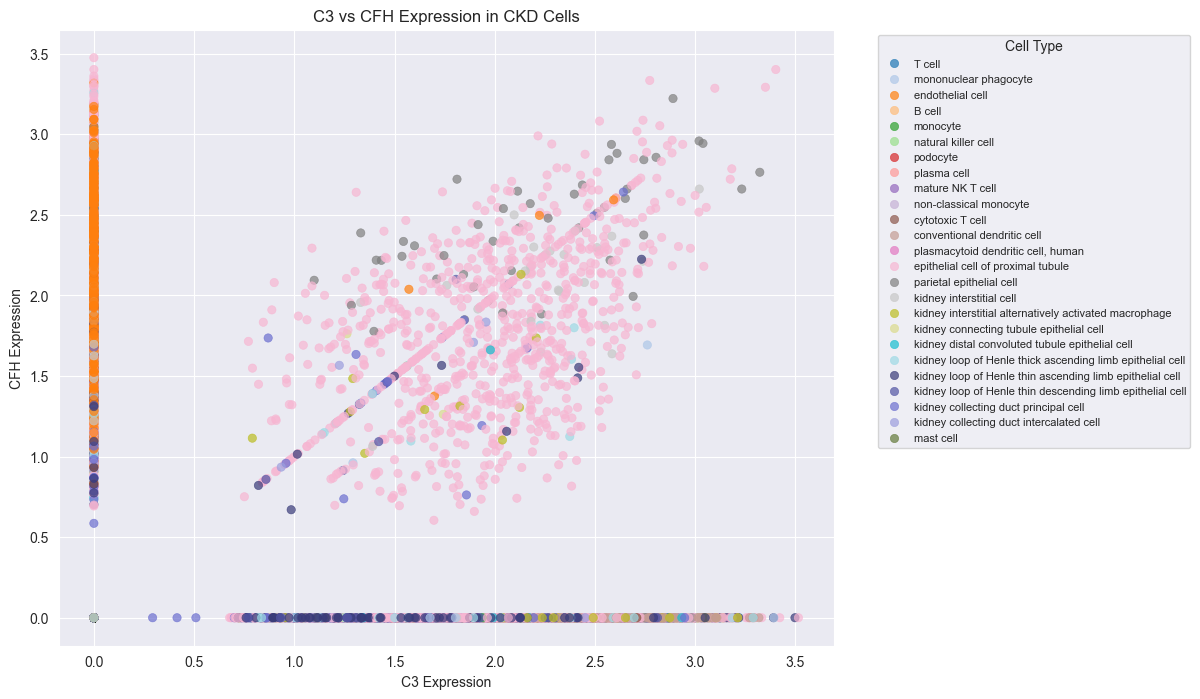

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse

def scatter_gene_expression(adata, disease, gene1, gene2, gene_dict, color_by='cell_type', save_path=None):
    """
    Creates a scatter plot of two genes' expression patterns colored by cell type or cell type group.

    Parameters
    ----------
    adata : AnnData
        AnnData object containing single-cell RNA-seq data.
    disease : str
        The disease state to subset (e.g., 'AKI', 'CKD', 'Reference').
    gene1 : str
        Name of the first gene (x-axis).
    gene2 : str
        Name of the second gene (y-axis).
    gene_dict : dict
        Dictionary mapping gene names to Ensembl IDs for lookup in the expression matrix.
    color_by : str, optional
        Column name in adata.obs to use for coloring ('cell_type' or 'cell_type_group'). Default is 'cell_type'.
    save_path : str, optional
        Path to save the figure. If None, the figure is displayed but not saved.

    Returns
    -------
    None
    """
    # Subset data based on disease type
    adata = adata[adata.obs['diseasetype'] == disease, :].copy()

    # Fetch Ensembl ID from dictionary
    def get_ensembl_id(gene_name):
        return gene_dict.get(gene_name, gene_name)

    # Extract and flatten gene expression values
    def get_expression(ensembl_id):
        exp = adata[:, ensembl_id].X
        return exp.toarray().ravel() if scipy.sparse.issparse(exp) else exp.ravel()

    # Get gene expressions
    gene1_ensembl = get_ensembl_id(gene1)
    gene2_ensembl = get_ensembl_id(gene2)
    g1_vals = get_expression(gene1_ensembl)
    g2_vals = get_expression(gene2_ensembl)

    # Validate color_by column
    if color_by not in adata.obs.columns:
        raise ValueError(f"'{color_by}' column not found in adata.obs")

    # Get categories for coloring
    categories = adata.obs[color_by]
    unique_categories = list(categories.unique())

    # Use a discrete color palette (tab20 + additional colors if needed)
    palette = sns.color_palette("tab20", min(20, len(unique_categories)))
    if len(unique_categories) > 20:
        palette += sns.color_palette("tab20b", len(unique_categories) - 20)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=g1_vals, y=g2_vals, hue=categories, palette=palette, alpha=0.7, edgecolor=None)

    # Set labels and title
    plt.xlabel(f'{gene1} Expression')
    plt.ylabel(f'{gene2} Expression')
    plt.title(f'{gene1} vs {gene2} Expression in {disease} Cells')

    # Adjust legend for clarity
    plt.legend(title=color_by.replace('_', ' ').title(), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, markerscale=1)

    # Save or show plot
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.show()

# Example usage
scatter_gene_expression(adata, 'CKD', 'C3', 'CFH', gene_dict, color_by='cell_type')
# Example usage with cell type group


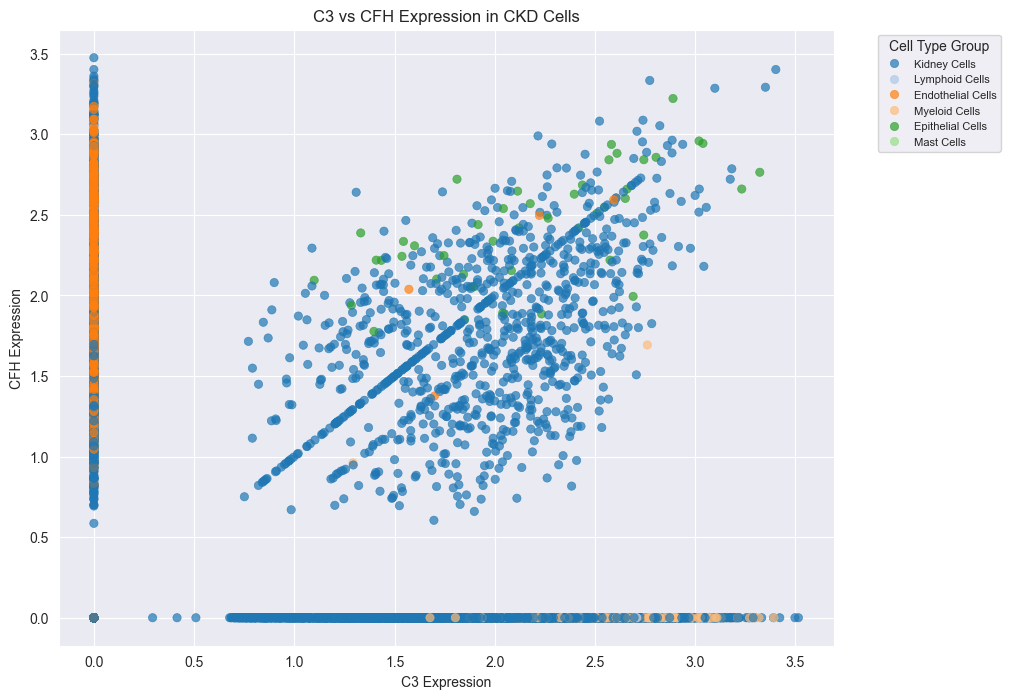

In [10]:
scatter_gene_expression(adata, 'CKD', 'C3', 'CFH', gene_dict, color_by='cell_type_group')